Sentiment analysis is the computational study of people's opinions, sentiments, emotions, and attitudes expressed through text. It is a vital tool in the commercial sector, allowing businesses to understand customer sentiment and monitor brand health through feedback on social media and other digital platforms.

In this notebook, we will develop a sentiment analysis model using classical machine learning techniques.

# Objectives:

- Gain a foundational understanding of sentiment analysis and its applications.
- Investigate some classical machine learning algorithms for sentiment analysis. Build and evaluate a sentiment analysis model using a traditional machine learning approach.

# Data set:

The [Sentiment140](http://help.sentiment140.com/for-students/) dataset is a collection of tweets specifically curated for sentiment analysis tasks. It provides a rich source of textual data labeled based on the sentiment expressed in each tweet.

What sets the Sentiment140 dataset apart is its unique approach to data collection and annotation. Instead of relying on manual human annotation, the dataset was automatically generated. Tweets with positive emoticons, like ":)", were labeled as positive, while those with negative emoticons, like ":(", were labeled as negative. This data was gathered using the Twitter Search API with keyword searches.

# Data Preprocessing

In [1]:
# The usual libraries for the classical part:
import matplotlib.pyplot as plt # Provides data structures and operations for manipulating numeric arrays.
import seaborn as sns # Python data visualization library based on matplotlib.
import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays.

In [2]:
# Column names:
columns = ['polarity', 'tweet_id', 'date', 'query', 'user', 'tweet_text']

# Read dataset:
dfComplete = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)

# I will sample 10% of the data set since this is a mini-project but also given the size of the dataset:
df = dfComplete.sample(frac=0.1, random_state=42)

In [3]:
# To display the first few rows of the dataset:
print(df.head())

print("-" * 100)

# To get a summary of the dataset:
df.info()

        polarity    tweet_id                          date     query  \
541200         0  2200003196  Tue Jun 16 18:18:12 PDT 2009  NO_QUERY   
750            0  1467998485  Mon Apr 06 23:11:14 PDT 2009  NO_QUERY   
766711         0  2300048954  Tue Jun 23 13:40:11 PDT 2009  NO_QUERY   
285055         0  1993474027  Mon Jun 01 10:26:07 PDT 2009  NO_QUERY   
705995         0  2256550904  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   

                   user                                         tweet_text  
541200  LaLaLindsey0609             @chrishasboobs AHHH I HOPE YOUR OK!!!   
750         sexygrneyes  @misstoriblack cool , i have no tweet apps  fo...  
766711       sammydearr  @TiannaChaos i know  just family drama. its la...  
285055      Lamb_Leanne  School email won't open  and I have geography ...  
705995      yogicerdito                             upper airways problem   
----------------------------------------------------------------------------------------------------
<cla

## Data cleaning

For what I understand, data cleaning in sentiment analysis should align accurately with the marketing goals you are pursuing. Given that these are tweets, they may contain URLs, mentions, special characters, and numbers that might not be relevant for sentiment analysis.

In [4]:
print('Dataset size:',df.shape)

Dataset size: (160000, 6)


In [5]:
import re # Regular expression module to do operations with text.

def clean_tweet(text):
    # Remove URLs:
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags:
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuations:
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers:
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase:
    text = text.lower()
    return text

df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)

In [6]:
# Randomly sample 5 tweets for comparison:
sample_tweets = df.sample(5, random_state=42)

# Display the original and cleaned tweets side by side:
for index, row in sample_tweets.iterrows():
    print("Original Tweet:\n", row['tweet_text'])
    print("\nCleaned Tweet:\n", row['cleaned_tweet'])
    print("\n" + "-"*80 + "\n")

Original Tweet:
 Can't wait to be at glacier national park 

Cleaned Tweet:
 cant wait to be at glacier national park 

--------------------------------------------------------------------------------

Original Tweet:
 @virtualhispanic Falling apart, ha? Maybe you can make two states out of it: Cali and Fornia 

Cleaned Tweet:
  falling apart ha maybe you can make two states out of it cali and fornia 

--------------------------------------------------------------------------------

Original Tweet:
 Awww, my brother cooked dinner and left for a bit and now theres none left for him  I didn't have much but I feel bad for him 

Cleaned Tweet:
 a my brother cooked dinner and left for a bit and now theres none left for him  i didnt have much but i feel bad for him 

--------------------------------------------------------------------------------

Original Tweet:
 @bassyc yeah i know little bit, not much.. this work keeps me busy all the time 

Cleaned Tweet:
  yeah i know little bit not muc

## Extra: Pre-wordcloud visualization

(Just because I think it is fun to do this right now).

In [7]:
#!pip install wordcloud

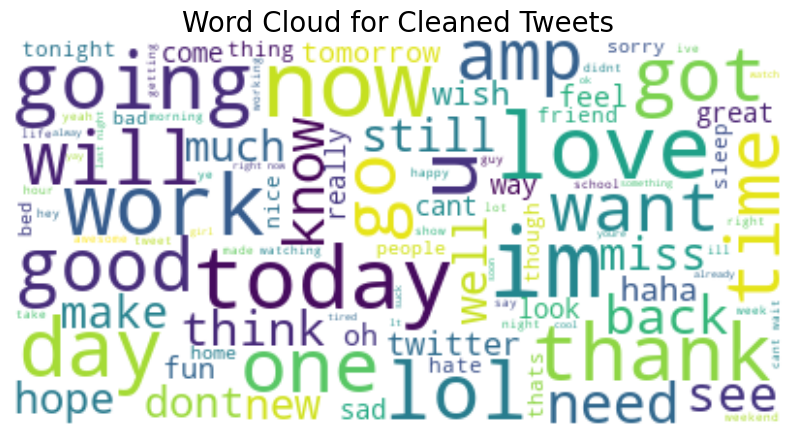

In [8]:
from wordcloud import WordCloud #To create the visualization.

# Combine all tweets into one big text:
all_tweets = " ".join(tweet for tweet in df['cleaned_tweet'])

# Generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_tweets)

# Display the generated image using matplotlib:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Cleaned Tweets', fontsize=20)
plt.axis('off')
plt.show()

# Tokenization:

Sentences are like puzzles, composed of individual pieces that, when assembled, create a beautiful picture. Just as a picture consists of puzzle pieces, a sentence consists of words, syllables, or characters. [Tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) involves breaking down the picture into its individual puzzle pieces. In NLP, tokenization refers to dividing a sequence of text into smaller units called "*tokens*," which can range from characters to words.

However, imagine attempting to comprehend the picture without seeing its individual pieces. It would be quite challenging, wouldn't it? Similarly, to comprehend, analyze, or manipulate language (such as determining sentence sentiment or translating between languages), it is often crucial to examine individual words or characters. By tokenizing text, we can gain insight into the meaning and structure of the entire text.

Tokenization serves as a fundamental step in numerous NLP tasks. It facilitates the transformation of complex and nuanced human language into smaller segments that machines can readily comprehend and process.

In [9]:
#!pip install nltk

In [10]:
#import nltk
#nltk.download('punkt')

In [11]:
from nltk.tokenize import word_tokenize # Does the split

df['tokenized_tweet'] = df['cleaned_tweet'].apply(word_tokenize)

# Remove stop words:

Stop words are common words that don't contribute much to the content or meaning of a document (e.g., "and", "the", "is").

In [12]:
#import nltk
#nltk.download('stopwords')

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['filtered_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)

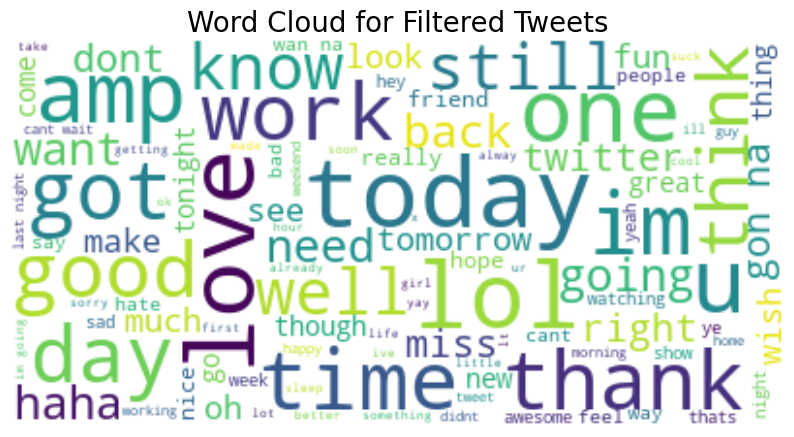

In [14]:
# Just to see back:
all_filtered_tweets = " ".join([" ".join(tokens) for tokens in df['filtered_tweet']])

wordcloud_filtered = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_filtered_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.title('Word Cloud for Filtered Tweets', fontsize=20)
plt.axis('off')
plt.show()

In [15]:
# Randomly sample 5 tweets for comparison:
sample_tweets = df.sample(5, random_state=42)

# Display the original and filtered tweets side by side
for index, row in sample_tweets.iterrows():
    print("Original Tweet:\n", row['cleaned_tweet'])
    print("\nFiltered Tweet:\n", " ".join(row['filtered_tweet']))
    print("\n" + "-"*80 + "\n")

Original Tweet:
 cant wait to be at glacier national park 

Filtered Tweet:
 cant wait glacier national park

--------------------------------------------------------------------------------

Original Tweet:
  falling apart ha maybe you can make two states out of it cali and fornia 

Filtered Tweet:
 falling apart ha maybe make two states cali fornia

--------------------------------------------------------------------------------

Original Tweet:
 a my brother cooked dinner and left for a bit and now theres none left for him  i didnt have much but i feel bad for him 

Filtered Tweet:
 brother cooked dinner left bit theres none left didnt much feel bad

--------------------------------------------------------------------------------

Original Tweet:
  yeah i know little bit not much this work keeps me busy all the time 

Filtered Tweet:
 yeah know little bit much work keeps busy time

--------------------------------------------------------------------------------

Original Tweet:
 hou

# EDA

Transforming numerical labels into more descriptive categorical labels can make the data more interpretable.

In [16]:
# Convert numerical polarity to categorical labels:
df['sentiment_label'] = df['polarity'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

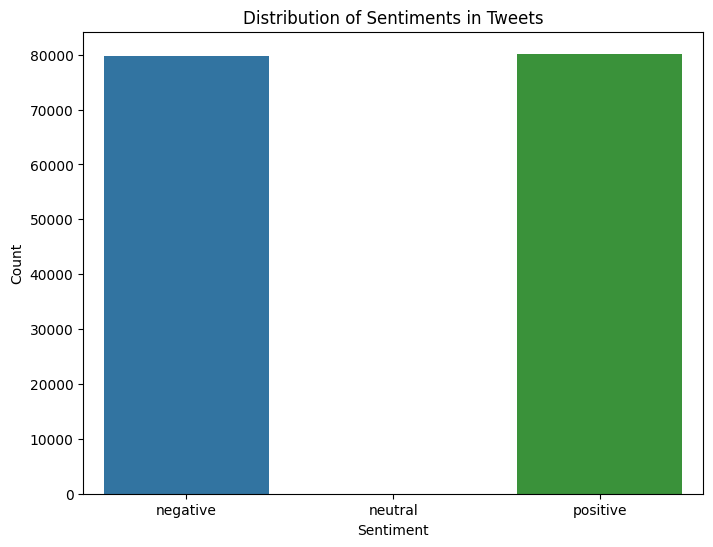

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Word frequency analysis

Let's analyze the most frequent words in each sentiment category. As a practice, this is to give us insights into what words are commonly associated with positive, negative, or neutral sentiments.

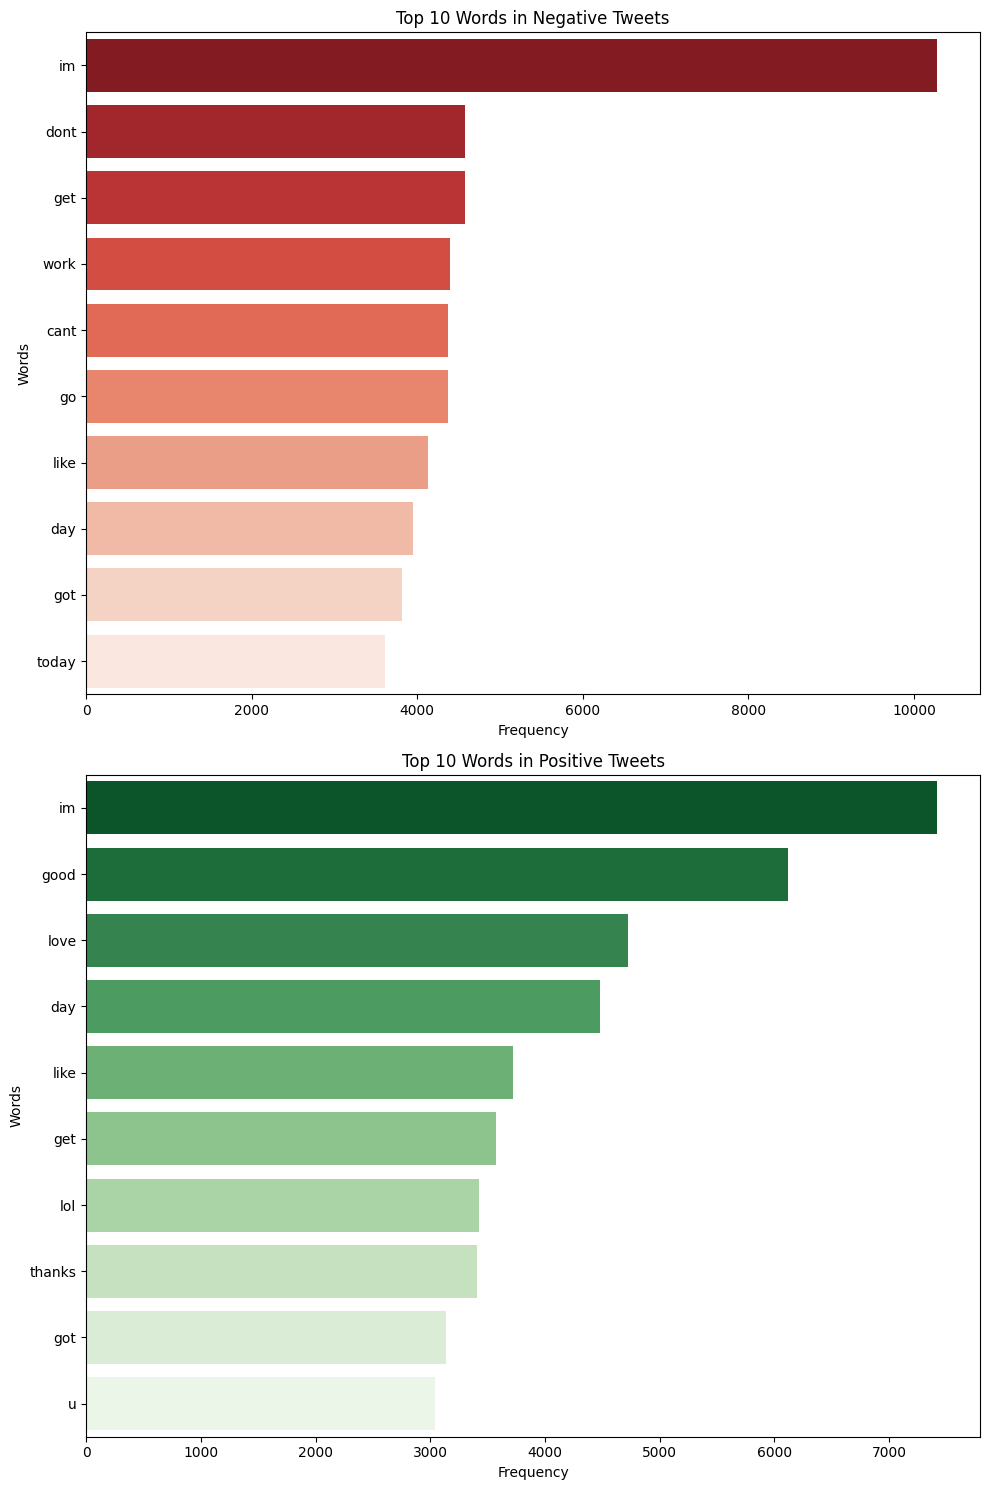

In [18]:
from collections import Counter

# Get the top N words for a given sentiment:
def get_top_n_words(sentiment, N=10):
    # Filter the df by sentiment and explode the 'filtered_tweet' column to get a series of words:
    words = df[df['sentiment_label'] == sentiment]['filtered_tweet'].explode()
    # Counter:
    word_freq = Counter(words)

    return word_freq.most_common(N)

# Get top 10 words for each sentiment:
top_negative = get_top_n_words('negative')
top_neutral = get_top_n_words('neutral')
top_positive = get_top_n_words('positive')

# Plot:
fig, axes = plt.subplots(2, 1, figsize=(10, 15)) # Put 3 if there are neutral words.

# Negative:
if top_negative:
    sns.barplot(x=[word[1] for word in top_negative], y=[word[0] for word in top_negative], ax=axes[0], palette='Reds_r')
    axes[0].set_title('Top 10 Words in Negative Tweets')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Words')
    
# From previous result, you can notice we don't have 'neutral', so that's why all here is commented.
# Neutral:
#if top_neutral:
 #   sns.barplot(x=[word[1] for word in top_neutral], y=[word[0] for word in top_neutral], ax=axes[1], palette='Blues_r')
  #  axes[1].set_title('Top 10 Words in Neutral Tweets')
   # axes[1].set_xlabel('Frequency')
    #axes[1].set_ylabel('Words')

# Positive:
if top_positive:
    sns.barplot(x=[word[1] for word in top_positive], y=[word[0] for word in top_positive], ax=axes[1], palette='Greens_r')
    axes[1].set_title('Top 10 Words in Positive Tweets') # Change to axis 2 in case of neutral words.
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Words')

plt.tight_layout()
plt.show()

From our analysis, it's evident that some frequently occurring words in both positive and negative sentiments don't offer clear insight into the sentiment itself. This might be due to the generic nature of default stop words in libraries like `NLTK`, which may not fully address nuances in specific datasets like tweets. Increasing our stop words list, perhaps by adding terms like "im" (I'm), could be beneficial. It's also crucial to note that a word's frequency doesn't always equate to its significance in determining sentiment. Techniques that **weigh words** based on their uniqueness in specific tweets versus the entire dataset might be more revealing. Additionally, exploring word combinations, such as [bigrams](https://www.educative.io/answers/what-is-a-bigram-language-model), can provide more context. For instance, phrases like "don't like" or "can't stand" might convey sentiment more effectively than their individual components. As this micro-project is an introductory exploration to familiarize with these techniques, and these challenges highlight areas for deeper investigation in future projects, I prefer to continue with the exploration and leave these ideas for future projects.

## Extra: Tweet Length Analysis

*Are negative tweets generally longer or shorter than positive ones?*

In [19]:
# New column to storage lenght:
df['tweet_length'] = df['cleaned_tweet'].apply(len)

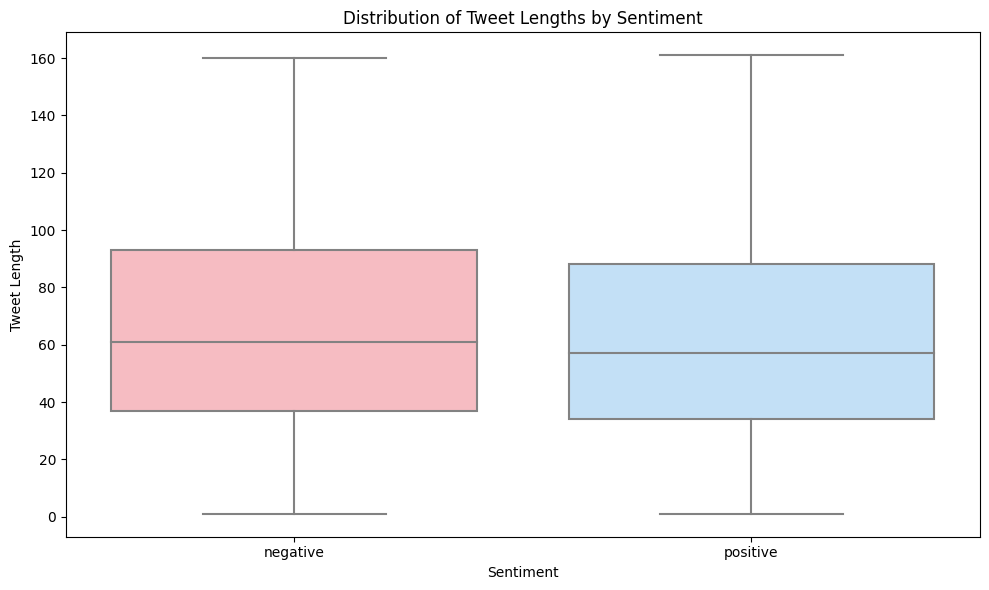

                   count       mean        std  min   25%   50%   75%    max
sentiment_label                                                             
negative         79812.0  65.627713  34.415535  1.0  37.0  61.0  93.0  160.0
positive         80188.0  62.269105  33.712044  1.0  34.0  57.0  88.0  161.0


In [20]:
colors = {
    'negative': '#FFB3BA',  # Pastel red
    'neutral': '#FFDFBA',  # Pastel orange
    'positive': '#BAE1FF'  # Pastel blue
}

plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='sentiment_label', y='tweet_length', data=df, palette=colors)

plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.tight_layout()
plt.show()

# Descriptive statistics for tweet lengths based on sentiment:
grouped_tweet_lengths = df.groupby('sentiment_label')['tweet_length'].describe()
print(grouped_tweet_lengths)

In [21]:
df.head() # Just to cehck

,polarity,tweet_id,date,query,user,tweet_text,cleaned_tweet,tokenized_tweet,filtered_tweet,sentiment_label,tweet_length
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh i hope your ok,"[ahhh, i, hope, your, ok]","[ahhh, hope, ok]",negative,21
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool i have no tweet apps for my razr,"[cool, i, have, no, tweet, apps, for, my, razr]","[cool, tweet, apps, razr]",negative,41
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,i know just family drama its lamehey next ti...,"[i, know, just, family, drama, its, lamehey, n...","[know, family, drama, lamehey, next, time, u, ...",negative,122
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,school email wont open and i have geography s...,"[school, email, wont, open, and, i, have, geog...","[school, email, wont, open, geography, stuff, ...",negative,84
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airways problem,"[upper, airways, problem]","[upper, airways, problem]",negative,22


Negative tweets tend to be slightly longer than positive tweets, as indicated by both the mean and median values. However, the difference is not substantial. The variability in tweet lengths is also similar for both sentiments. This suggests that while there might be a minor difference in the verbosity between negative and positive sentiments in this dataset, tweet length alone might not be a strong distinguishing feature for sentiment analysis.

# Data Splitting:

For text data, many models and vectorizers like [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) or [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) expect raw text data as input, not necessarily tokenized data. These vectorizers handle the tokenization and transformation of the text data into numerical format internally.

In [22]:
from sklearn.model_selection import train_test_split

# Using the cleaned_tweet column for splitting:
X = df['cleaned_tweet']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

extended_stop_words = set(stopwords.words('english')).union({'im'}) # TfidfVectorizer has their own stop words. I'm extending

vectorizer = TfidfVectorizer(stop_words=extended_stop_words)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training: Logistic Regression

[Logistic Regression](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=Logistic%20regression%20is%20a%20statistical,S-curve%20as%20shown%20below.) is a statistical method for analyzing datasets where the outcome variable is categorical (binary in nature). It estimates the probability that a given instance belongs to a particular category. In the context of sentiment analysis, Logistic Regression can be used to predict the probability of a tweet being positive, or negative, based on its content. The model produces a logistic curve, which is S-shaped and can take any real-valued number and map it between 0 and 1, making it suitable for a probability estimate. The coefficients of the model are estimated from the training data using the [maximum likelihood estimation method](https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67#:~:text=The%20Maximum%20Likelihood%20Estimation%20(MLE,that%20maximize%20the%20likelihood%20function.).

The logistic function is given by:
$
f(z)=\dfrac{1}{1+\exp^{-z}},
$

where z is the input.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize:
logreg = LogisticRegression(max_iter=1000)

# Train:
logreg.fit(X_train_tfidf, y_train)

# Predictions:
y_pred_train = logreg.predict(X_train_tfidf)
y_pred_test = logreg.predict(X_test_tfidf)

# Evaluate the model:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification for test data:
print("\nClassification Report (Test Data):\n")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.8240
Test Accuracy: 0.7708

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     15878
           4       0.76      0.79      0.78     16122

    accuracy                           0.77     32000
   macro avg       0.77      0.77      0.77     32000
weighted avg       0.77      0.77      0.77     32000



The model performs reasonably well in predicting the sentiment of tweets. Both classes (positive and negative) have comparable precision, recall, and F1-scores, suggesting that the model doesn't heavily favor one class over the other. However, there's a drop in accuracy from training to test. This may suggests there is some overfitting, and further  regularization might improve the model's generalization.

In [25]:
# Probabilities for the positive class (class 4):
#y_prob_test = logreg.predict_proba(X_test_tfidf)[:, 1]

# Let's sort probabilities (subset of the data):
#sorted_indices = np.argsort(y_prob_test)
#sorted_probabilities = y_prob_test[sorted_indices]
#sorted_true_labels = y_test.iloc[sorted_indices].values

# True to be between 0 and 1 for visualization:
#normalized_true_labels = np.where(sorted_true_labels == 4, 1, 0)

# Plot:
#plt.figure(figsize=(15, 6))
#plt.plot(sorted_probabilities, 'o-', label='Predicted Probability')
#plt.plot(normalized_true_labels, 'ro', label='True Label (Normalized)')
#plt.title('Predicted Probabilities vs. True Labels for Test Data')
#plt.xlabel('Test Instances')
#plt.ylabel('Probability / True Label')
#plt.legend()
#plt.grid(True)
#plt.show()

In [26]:
# Let's check!
def predict_sentiment(tweet, model, vectorizer, preprocess_func):
    # Preprocess the tweet with the function we defined above:
    cleaned_tweet = preprocess_func(tweet)
    
    # Convert the cleaned tweet into a format that the model can understand. In our case, using TfidfVectorizer:
    tweet_vectorized = vectorizer.transform([cleaned_tweet])
    
    # Predict the sentiment with the model we trained:
    prediction = model.predict(tweet_vectorized)
    
    # Convert numerical prediction back to label:
    if prediction == 0:
        return "negative"
    else:
        return "positive"

# Example:
tweet = "I love this product!"
sentiment = predict_sentiment(tweet, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: positive


In [27]:
tweet2 = "I hate this product!"
sentiment = predict_sentiment(tweet2, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: negative


In [28]:
tweet3 = "Yesterday night was bored dude"
sentiment = predict_sentiment(tweet3, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: negative


In [29]:
tweet4 = "Yesterday night was awesome dude"
sentiment = predict_sentiment(tweet4, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: positive


In [30]:
tweet5 = "THIS IS AMAZING, I AM LOVING THIS PROJECT! SO INTERESTING"
sentiment = predict_sentiment(tweet5, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: positive


In [31]:
tweet6 = "I hope I managed to do it with the quantum computing now"
sentiment = predict_sentiment(tweet6, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: positive


In [32]:
tweet6 = "I'm tired. I don't want to continue. Maybe I should go sleep and call it a night"
sentiment = predict_sentiment(tweet6, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: negative


In [33]:
tweet7 = "Hey @sauchel, I LOVED ur talk yesterday, very interesting"
sentiment = predict_sentiment(tweet7, logreg, vectorizer, clean_tweet)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: positive
